# **Text Mining Project**
## **PHASE THREE 3**
##**Analyzing the NTSB Aviation Accident Reports**
### **Coded by Nastaran Arzamani**
### **Fall 2022**

Nastaran Arzamani, MSc, MBA\
Flight Data and Aviation Accident Report Analyst,\
PhD Student and GRA in Aviation Safety,\
Aerospace Engineering, Oklahoma State University,\
nastaran.arzamanil@okstate.edu


In [1]:
# It is a step-by-step project description. You may find other modules further then!
# The pre-process steps were conducted in a previous project, whose outcome was: "Summarized_NTSB_Data_v6"
# And in a further step: "Modified_Clear_NTSB_onlyCausal_v2"
# So, the input file for the current project would be the "Modified_Clear_NTSB_onlyCausal_v2".

# *****  MY notes here!
# For this project, I have focused on the accident/incident reports of the
# general aviation -Part 91 of the Federal Acquisition Regulation, FAR- aircraft.
# Additionally, I have examined the accidents/incidents occurred on and after 1/1/2009.
# The datasets do not completely overlap, so I needed to proceed and remove iteratively
# accidents/incidents that belong to all the datasets. Also, in some cases, there were only
# one row existing for the events and this means that only one aircraft was involved in those
# accidents/incidents. One the other hand, I have found two or more rows for those mentioned events,
# which bears this meaning that two or more aircrafts were involved in. Therefore, after days of
# spending on these issues and discovering such valuable facts in all datasets, I narrowed my
# focus on accidnets in which only one aircraft was involved.

In [5]:
## Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv


# Of the new created excel file:
filename = 'Modified_Clear_NTSB_onlyCausal_v2.csv'
df= pd.read_csv(filename)
df = df.fillna('NONE')

(df.columns) #:
# Index(['ev_id_new', 'damage_new', 'evtype_new', 'year_new', 'fatal_new',
#        'finding_new', 'pnar_new', 'fnar_new', 'cnar_new'],
#       dtype='object')

Index(['ev_id_new', 'damage_new', 'evtype_new', 'year_new', 'fatal_new',
       'finding_new', 'cnar_new'],
      dtype='object')

In [6]:
finding=list(df[df.columns[5]])    #list of contributing factors
# narrative1=list(df[df.columns[6]]) #pnar: priliminary
# narrative2=list(df[df.columns[7]]) #fnar: factual
narrative3=list(df[df.columns[6]]) #cnar: causal, AKA final

In [7]:
narrative3[0]

"The student pilot's failure to maintain directional control during takeoff. Contributing to the accident was the student pilot's lack of solo flight experience and the snow bank located off the left side of the runway."

In [8]:
finding[0] # *** DIFFERENT TYPE: Do not forget to either flatten it or re-build it! :)

"['Aircraft-Aircraft oper/perf/capability-Performance/control parameters-Directional control-Not attained/maintained - C', 'Personnel issues-Experience/knowledge-(general)-(general)-Student pilot - F', 'Environmental issues-Physical environment-Terrain-Snowy/icy-Not specified - F', 'Personnel issues-Task performance-Use of equip/info-Aircraft control-Student pilot - C']"

In [9]:
# importing agian! :D
import nltk
nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize
from nltk.probability import FreqDist

import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
len(narrative3)

12321

##Let's Focus on the **Causal Narratives** (The 3rd and last one) for a while!

# Lower Cases

In [11]:
# First LOWER CASE! ******* Official beginning of appyling the NLP 

nar3_low=[]
for idx, itm in enumerate (narrative3):
   
  tlow=itm.lower()
  nar3_low.append(tlow)

In [12]:
len(nar3_low) # Let's always check to make sure everything is correct beofre you lose the track!

12321

# Remove Numbers

In [13]:
# Let's replace numbers here with empty spaces!
nums= r'[0-9]' #digits
# Match all digits in the string and replace them with an empty string

nar3_nonum=[]

for idx , itm in enumerate (nar3_low):
  new_string = re.sub(nums, '',itm)

  nar3_nonum.append(new_string)

In [14]:
nar3_nonum[-1]

'a total loss of engine power due to cold seizure for a reason that could not be determined, and the pilot’s subsequent exceedance of the airplane’s critical angle of attack, which resulted in an aerodynamic stall and impact with the ground.\n'

# Tokenize
It is finally time for Tokenizing.

In [15]:
nar3_tkn=[]
for itm in nar3_nonum:
  nar3_tkn.append(word_tokenize(itm))

In [16]:
nar3_tkn[-1]

['a',
 'total',
 'loss',
 'of',
 'engine',
 'power',
 'due',
 'to',
 'cold',
 'seizure',
 'for',
 'a',
 'reason',
 'that',
 'could',
 'not',
 'be',
 'determined',
 ',',
 'and',
 'the',
 'pilot',
 '’',
 's',
 'subsequent',
 'exceedance',
 'of',
 'the',
 'airplane',
 '’',
 's',
 'critical',
 'angle',
 'of',
 'attack',
 ',',
 'which',
 'resulted',
 'in',
 'an',
 'aerodynamic',
 'stall',
 'and',
 'impact',
 'with',
 'the',
 'ground',
 '.']

# Remove Stop Words

In [17]:
# Importing again Of course! Stop words in English.

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'again', 'both', 'just', "isn't", 'him', 'nor', 'which', 'don', 'once', 'doesn', 'or', "shouldn't", "you're", 'when', 'can', 'd', 'being', 'not', 't', "hadn't", 'its', 'during', 'an', 'mustn', 'of', 'won', "you'd", 'no', 'these', 'then', 'we', 's', 'do', 'the', 'than', "shan't", 'yourself', 'few', 'but', 'himself', 'here', 'her', 'too', 'herself', 'i', 'y', "wasn't", "won't", 'now', 'is', "didn't", 'has', 'a', 'how', 'as', "aren't", 'own', 'had', "doesn't", "mightn't", 'did', 'have', 'most', 'between', 'off', 'some', 'same', 'ourselves', 'am', 'ma', 'shouldn', 'it', 'are', 'below', 'very', 'over', 'should', 'didn', 'aren', 'so', 'before', 'theirs', 'hadn', 'does', 'through', 'hasn', 'while', 'this', 'to', 'such', "that'll", 'above', 'his', 'until', 'with', 'be', 'wasn', "you'll", 'isn', 'shan', 'by', 'you', 'needn', 'couldn', 'mightn', 'them', "couldn't", 'our', "should've", 'was', 'any', 'me', 'under', 'ain', 'each', 'only', 'my', "hasn't", 'where', 'hers', "it's", 'in', 'whom', 'bec

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
nar3_stpw=[]
for idx , itm in enumerate (nar3_tkn):
  nar3_stpw.append([])
  for w in itm:
      if w not in stop_words:
          nar3_stpw[idx].extend([w])

In [19]:
nar3_stpw[-1]

['total',
 'loss',
 'engine',
 'power',
 'due',
 'cold',
 'seizure',
 'reason',
 'could',
 'determined',
 ',',
 'pilot',
 '’',
 'subsequent',
 'exceedance',
 'airplane',
 '’',
 'critical',
 'angle',
 'attack',
 ',',
 'resulted',
 'aerodynamic',
 'stall',
 'impact',
 'ground',
 '.']

In [20]:
if('the' in stop_words):
  print("yes") # Satisfy your curiosity! :D

yes


In [21]:
import string
string.punctuation
regular_punct = list(string.punctuation)

## Domain's Stop Words

While a specific word would bear a valuable meaning in a field of study, it would be exactly the opposite in another field, having no meaning at all and being considered as a useless word. So, you need to apply insights here! Good luck! :)

For instance, the names of the months, cities, airplanes, and direcitons in this dataset are not important for my current study, so I just ignored them! :)

In [22]:
regular_punct.extend(['--','january','february','march','april','may','june','july','august','september','october','november','december','north','south','east','west','northern','southern','eastern','western','piper','carolina','pa','n','one',"'",'s','’',"'s"]) # EVEN Other puncts and WORDS HERE! :)

In [23]:
nar3_nopunc=[]

for idx , itm in enumerate (nar3_stpw):
  nar3_nopunc.append([])
  for w in itm:
    if w not in regular_punct:
      nar3_nopunc[idx].extend([w])

In [24]:
print(len(nar3_stpw[-1]))
print(len(nar3_nopunc[-1]))

27
22


Wow! Effecitve! It is gonna save our computational resources!

In [25]:
nar3_nopunc[-1]

['total',
 'loss',
 'engine',
 'power',
 'due',
 'cold',
 'seizure',
 'reason',
 'could',
 'determined',
 'pilot',
 'subsequent',
 'exceedance',
 'airplane',
 'critical',
 'angle',
 'attack',
 'resulted',
 'aerodynamic',
 'stall',
 'impact',
 'ground']

# Find Stem-Words

In [26]:
# Importing of course! Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer

# Choose your own verison of stemming. I chose the SnowballStemmer for my current project,
# after comparing the results of these two for some narratives.

In [27]:
print(SnowballStemmer("english").stem("generously"))
print(SnowballStemmer("porter").stem("generously\n"))

print(SnowballStemmer("english").stem("flying"))

generous
generously

fli


Let's continue with the SnowballStemmer:

In [28]:
print(" ".join(SnowballStemmer.languages)) # Look at the available options here! Wow.

arabic danish dutch english finnish french german hungarian italian norwegian porter portuguese romanian russian spanish swedish


In [29]:
stemmer = SnowballStemmer("english") # Of course, I need to continue with the English.

In [30]:
nar3_stemEng=[]

for idx , itm in enumerate (nar3_nopunc):
  nar3_stemEng.append([])
  for w in itm:
      nar3_stemEng[idx].extend([stemmer.stem(w)])

In [31]:
nar3_stemEng[0]

['student',
 'pilot',
 'failur',
 'maintain',
 'direct',
 'control',
 'takeoff',
 'contribut',
 'accid',
 'student',
 'pilot',
 'lack',
 'solo',
 'flight',
 'experi',
 'snow',
 'bank',
 'locat',
 'left',
 'side',
 'runway']

# Target Point

We are done with data-preparing. It is time to start analyizng! Let's **shift from textual qualitative data to the numerical quantitative data**! It will be fun. :)

Our input here is:
INSERT_stemEng

In [32]:
sent = 'This is an example sentence'
fdist = FreqDist()
for word in word_tokenize(sent):
  fdist[word.lower()] += 1

fdist

# This is for you to realize what is gonna happen in this part!

FreqDist({'this': 1, 'is': 1, 'an': 1, 'example': 1, 'sentence': 1})

In [33]:
freqlist=[]
for itm in nar3_stemEng:
  freqlist.append(FreqDist(itm))

In [34]:
freqlist[0]

FreqDist({'student': 2, 'pilot': 2, 'failur': 1, 'maintain': 1, 'direct': 1, 'control': 1, 'takeoff': 1, 'contribut': 1, 'accid': 1, 'lack': 1, ...})

In [35]:
len(freqlist[0])

19

In [36]:
table_df = pd.DataFrame(freqlist)
table_df

,student,pilot,failur,maintain,direct,control,takeoff,contribut,accid,lack,...,draft,transmitt,neck,intrus,cut-off,uncontamin,anchored-thru,free-thru,forced-land,u-bolt
0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12316,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12317,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12318,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12319,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


Here, I filled the NaN cells with zero, as we do not want to deal with anything other than numbers anymore!

In [37]:
table_df.fillna(value=0, inplace=True)
table_df

,student,pilot,failur,maintain,direct,control,takeoff,contribut,accid,lack,...,draft,transmitt,neck,intrus,cut-off,uncontamin,anchored-thru,free-thru,forced-land,u-bolt
0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12316,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12317,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12318,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12319,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
(table_df.shape[1]) #checked! Number of independent filtered words present in the Causal Naratives.

3468

Let's add Event Id numbes here!

In [39]:
df[df.columns[0]]

0        20090101X22627
1        20090102X02015
2        20090103X05930
3        20090103X62819
4        20090103X93911
              ...      
12316    20200922X90108
12317    20200922X91109
12318    20200923X30413
12319    20200923X61025
12320    20200924X32551
Name: ev_id_new, Length: 12321, dtype: object

In [40]:
table_df.insert(0,"ev_id",df[df.columns[0]])


In [41]:
table_df

,ev_id,student,pilot,failur,maintain,direct,control,takeoff,contribut,accid,...,draft,transmitt,neck,intrus,cut-off,uncontamin,anchored-thru,free-thru,forced-land,u-bolt
0,20090101X22627,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20090102X02015,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20090103X05930,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20090103X62819,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20090103X93911,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12316,20200922X90108,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12317,20200922X91109,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12318,20200923X30413,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12319,20200923X61025,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Save the table into a CSV file!

In [42]:
table_df.to_csv("WordsinEvents_narrative3.csv")

#**Quantitative Analysis**

The first chosen word for analysis is "student".

## Student

In [43]:
table_df[table_df.columns[1]]

0        2.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12316    0.0
12317    0.0
12318    0.0
12319    0.0
12320    0.0
Name: student, Length: 12321, dtype: float64

In [44]:
events_student=[]
for idx , event in enumerate (table_df[table_df.columns[1]]):
  if event !=0:
    events_student.append(table_df[table_df.columns[0]][idx])

events_student[0]

'20090101X22627'

In [45]:
len(events_student) # Number of events related to the word "student"

843

## Building the "student" table

In [416]:
newtable_df= table_df[(table_df.student != 0)]# & (table_df.land == 1)]

In [417]:
newtable_df

,ev_id,student,pilot,failur,maintain,direct,control,takeoff,contribut,accid,...,draft,transmitt,neck,intrus,cut-off,uncontamin,anchored-thru,free-thru,forced-land,u-bolt
0,20090101X22627,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,20090105X15328,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,20090113X83112,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,20090125X55400,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,20090203X42525,2.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12276,20200910X15331,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12280,20200911X75746,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12282,20200913X04625,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12291,20200915X42025,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [418]:
newtable_df = newtable_df.loc[:, (newtable_df != 0).any(axis=0)]

In [419]:
newtable_df

,ev_id,student,pilot,failur,maintain,direct,control,takeoff,contribut,accid,...,inad,remedia,told,lighti,positiv,self-impos,satur,pictur,snow/slush-cov,winglet
0,20090101X22627,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,20090105X15328,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,20090113X83112,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,20090125X55400,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,20090203X42525,2.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12276,20200910X15331,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12280,20200911X75746,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12282,20200913X04625,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12291,20200915X42025,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [420]:
newtable_df.columns

Index(['ev_id', 'student', 'pilot', 'failur', 'maintain', 'direct', 'control',
       'takeoff', 'contribut', 'accid',
       ...
       'inad', 'remedia', 'told', 'lighti', 'positiv', 'self-impos', 'satur',
       'pictur', 'snow/slush-cov', 'winglet'],
      dtype='object', length=695)

In [61]:
newtable_df.to_csv("StudentinEvents_narrative3.csv")

In [421]:
sum_total = newtable_df.sum()
sum_total=sum_total.T
sum_total=sum_total.drop("ev_id")
# sum_total=sum_total.drop("index")
sum_total

student           898.0
pilot             883.0
failur            452.0
maintain          363.0
direct            260.0
                  ...  
self-impos          1.0
satur               1.0
pictur              1.0
snow/slush-cov      2.0
winglet             1.0
Length: 694, dtype: object

In [422]:
sum_total=sum_total.sort_values(ascending=False, inplace=False)
sum_total

student    898.0
pilot      883.0
land       739.0
result     516.0
failur     452.0
           ...  
full         1.0
receiv       1.0
evalu        1.0
r            1.0
winglet      1.0
Length: 694, dtype: object

In [423]:
sum_total[:20]

student       898.0
pilot         883.0
land          739.0
result        516.0
failur        452.0
control       452.0
maintain      363.0
direct        260.0
improp        254.0
flight        242.0
flare         220.0
runway        193.0
instructor    193.0
loss          176.0
airplan       169.0
hard          148.0
takeoff       144.0
bounc         123.0
contribut     108.0
subsequ       105.0
dtype: object

In [427]:
newtable_df

,index,ev_id,student,pilot,failur,maintain,direct,control,takeoff,contribut,...,inad,remedia,told,lighti,positiv,self-impos,satur,pictur,snow/slush-cov,winglet
0,0,20090101X22627,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,20090105X15328,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24,20090113X83112,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50,20090125X55400,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,72,20090203X42525,2.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,12276,20200910X15331,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
839,12280,20200911X75746,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
840,12282,20200913X04625,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
841,12291,20200915X42025,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [429]:
s_df=newtable_df.T
# .drop("ev_id")
# s_df=s_df.reset_index(inplace=True)
# s_df=s_df
# s_df=s_df.drop("index")
# # s_df=s_df.reset_index(inplace=True)
s_df

,0,1,2,3,4,5,6,7,8,9,...,833,834,835,836,837,838,839,840,841,842
index,0,7,24,50,72,73,93,129,132,147,...,12221,12223,12233,12245,12250,12276,12280,12282,12291,12295
ev_id,20090101X22627,20090105X15328,20090113X83112,20090125X55400,20090203X42525,20090204X22909,20090217X51045,20090304X60041,20090305X52415,20090309X43538,...,20200821X24852,20200821X55619,20200825X95305,20200831X04752,20200831X81753,20200910X15331,20200911X75746,20200913X04625,20200915X42025,20200916X64002
student,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
pilot,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
failur,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
self-impos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
satur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pictur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
snow/slush-cov,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [430]:
s_df=s_df.drop("index")
s_df

,0,1,2,3,4,5,6,7,8,9,...,833,834,835,836,837,838,839,840,841,842
ev_id,20090101X22627,20090105X15328,20090113X83112,20090125X55400,20090203X42525,20090204X22909,20090217X51045,20090304X60041,20090305X52415,20090309X43538,...,20200821X24852,20200821X55619,20200825X95305,20200831X04752,20200831X81753,20200910X15331,20200911X75746,20200913X04625,20200915X42025,20200916X64002
student,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
pilot,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
failur,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
maintain,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
self-impos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
satur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pictur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
snow/slush-cov,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [431]:
s_df=s_df.drop("ev_id")
s_df

,0,1,2,3,4,5,6,7,8,9,...,833,834,835,836,837,838,839,840,841,842
student,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
pilot,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
failur,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
maintain,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
direct,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
self-impos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
satur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pictur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
snow/slush-cov,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [432]:
freq_word = {}
for word in s_df.index[:]:
  freq_word[word]=[]
  for i in range(s_df.shape[1]):
    freq_word[word].append(s_df.loc[word][i]/sum(s_df[i]))
freq_word=pd.DataFrame(freq_word)
freq_word

,student,pilot,failur,maintain,direct,control,takeoff,contribut,accid,lack,...,inad,remedia,told,lighti,positiv,self-impos,satur,pictur,snow/slush-cov,winglet
0,0.095238,0.095238,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.142857,0.142857,0.000000,0.142857,0.142857,0.142857,0.142857,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.052632,0.052632,0.052632,0.052632,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.100000,0.100000,0.050000,0.050000,0.050000,0.050000,0.100000,0.000000,0.050000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,0.066667,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
839,0.055556,0.055556,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
840,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
841,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [433]:
freq_word.to_csv("TF_student_narrative3.csv")

In [434]:
table_slice = s_df[:][s_df.columns[:]]
table_slice_condition = table_slice[table_slice != 0]

inv_den = {}
for word in table_slice.index:
  inv_den[word]= [np.log2(table_slice.columns.shape[0]/table_slice_condition.loc[word].dropna().shape[0])] if (table_slice_condition.loc[word].dropna().shape[0]) != 0 else 0

inv_den=pd.DataFrame(inv_den,index=["IDF"])
inv_den.T.to_csv("IDF_narrative2.csv")
inv_den = inv_den.T
inv_den

,IDF
student,0.000000
pilot,0.032888
failur,0.988070
maintain,1.227536
direct,1.708162
...,...
self-impos,9.719389
satur,9.719389
pictur,9.719389
snow/slush-cov,9.719389


In [435]:
inv_den.to_csv("IDF_student_narrative3.csv")

In [436]:
TF_IDF = freq_word.copy()
for word in table_slice.index:
  TF_IDF[word] = freq_word[word]*inv_den.loc[word][0]

TF_IDF.to_csv("TF-IDF_narrative3.csv")
TF_IDF

,student,pilot,failur,maintain,direct,control,takeoff,contribut,accid,lack,...,inad,remedia,told,lighti,positiv,self-impos,satur,pictur,snow/slush-cov,winglet
0,0.0,0.003132,0.047051,0.058454,0.081341,0.046088,0.127381,0.141806,0.147144,0.26426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.004698,0.000000,0.175362,0.244023,0.138264,0.382142,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.001731,0.052004,0.064607,0.000000,0.000000,0.140789,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.002193,0.065871,0.081836,0.113877,0.064523,0.178333,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.003289,0.049403,0.061377,0.085408,0.048392,0.267499,0.000000,0.154502,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,0.0,0.002193,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
839,0.0,0.001827,0.000000,0.000000,0.000000,0.053769,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
840,0.0,0.004111,0.123509,0.153442,0.213520,0.120981,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
841,0.0,0.003654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Dictionary limited by K is : {'land': 45.3659396177531, 'improp': 45.04729838042575, 'flare': 42.997817822921704, 'direct': 42.19136085351933, 'maintain': 39.03032363727992, 'control': 37.89833588661979, 'failur': 36.32096143234204, 'bounc': 35.33337740624994, 'hard': 34.79979744086178, 'takeoff': 32.80987993618855}


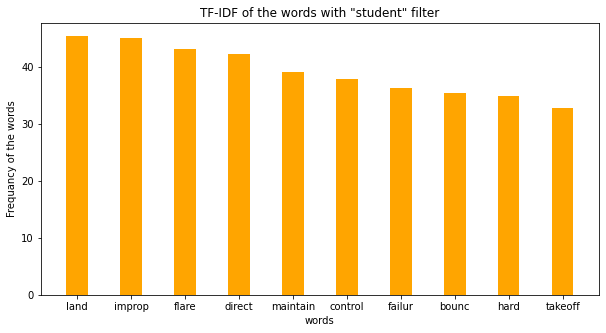

In [438]:
# now calculate the sum
sum_tf_idf = TF_IDF.sum()
sum_tf_idf
sum_tf_idf=sum_tf_idf.sort_values(ascending=False, inplace=False)
sum_tf_idf
dict_tf_idf=dict(sum_tf_idf)
# Python program to get N key:value pairs in given dictionary
# using itertools.islice() method

# Initialize limit
N = 10
     
# Using islice() + items()
# Get first N items in dictionary
out = dict(itertools.islice(dict_tf_idf.items(), N))
         
# printing result
print("Dictionary limited by K is : " + str(out))
wrd = list(out.keys())
val = list(out.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(wrd, val, color ='orange',
        width = 0.4)
 
plt.xlabel("words")
plt.ylabel("Frequancy of the words")
plt.title('TF-IDF of the words with "student" filter')
plt.show() 


Student + Land

In [141]:
sl_df= newtable_df[(newtable_df.land != 0)]
sl_df.reset_index(inplace=True)
sl_df

,index,ev_id,student,pilot,failur,maintain,direct,control,takeoff,contribut,...,inad,remedia,told,lighti,positiv,self-impos,satur,pictur,snow/slush-cov,winglet
0,129,20090304X60041,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,132,20090305X52415,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,158,20090311X30109,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,164,20090316X41503,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,183,20090320X05050,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,12276,20200910X15331,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
525,12280,20200911X75746,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
526,12282,20200913X04625,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
527,12291,20200915X42025,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
# now calculate the sum
s = sl_df.sum()
s

index                                                       3450513
ev_id             20090304X6004120090305X5241520090311X301092009...
student                                                       552.0
pilot                                                         545.0
failur                                                        242.0
                                        ...                        
self-impos                                                      1.0
satur                                                           1.0
pictur                                                          0.0
snow/slush-cov                                                  2.0
winglet                                                         0.0
Length: 696, dtype: object

In [194]:
s.loc["land"]

739.0

#Frequency

In [195]:
slt_df=sl_df.T
slt_df=slt_df.drop("ev_id")
slt_df=slt_df.drop("index")
slt_df

,0,1,2,3,4,5,6,7,8,9,...,519,520,521,522,523,524,525,526,527,528
student,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
pilot,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
failur,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
maintain,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
direct,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
self-impos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
satur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pictur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
snow/slush-cov,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [196]:
freq_word = {}
for word in slt_df.index[:]:
  freq_word[word]=[]
  for i in range(slt_df.shape[1]):
    freq_word[word].append(slt_df.loc[word][i]/sum(slt_df[i]))
freq_word=pd.DataFrame(freq_word)
freq_word

,student,pilot,failur,maintain,direct,control,takeoff,contribut,accid,lack,...,inad,remedia,told,lighti,positiv,self-impos,satur,pictur,snow/slush-cov,winglet
0,0.166667,0.166667,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.166667,0.166667,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.142857,0.142857,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.100000,0.100000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.076923,0.076923,0.153846,0.000000,0.000,0.000000,0.0,0.076923,0.076923,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,0.066667,0.066667,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
525,0.055556,0.055556,0.000000,0.000000,0.000,0.055556,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
526,0.125000,0.125000,0.125000,0.125000,0.125,0.125000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
527,0.111111,0.111111,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
freq_word.to_csv("TF_sl_narrative3.csv")

In [198]:
s

index                                                       3450513
ev_id             20090304X6004120090305X5241520090311X301092009...
student                                                       552.0
pilot                                                         545.0
failur                                                        242.0
                                        ...                        
self-impos                                                      1.0
satur                                                           1.0
pictur                                                          0.0
snow/slush-cov                                                  2.0
winglet                                                         0.0
Length: 696, dtype: object

In [199]:
s=s.drop("index")
s=s.drop("ev_id")
s

student           552.0
pilot             545.0
failur            242.0
maintain          196.0
direct            166.0
                  ...  
self-impos          1.0
satur               1.0
pictur              0.0
snow/slush-cov      2.0
winglet             0.0
Length: 694, dtype: object

In [200]:
sort_sl=s.sort_values(ascending=False, inplace=False)

In [218]:
sort_sl=dict(sort_sl)

In [221]:
sl_dict={x:y for x,y in sort_sl.items() if y!=0}

In [224]:
# Python program to get N key:value pairs in given dictionary
# using itertools.islice() method
 
import itertools

# Initialize limit
N = 10
     
# Using islice() + items()
# Get first N items in dictionary
out = dict(itertools.islice(sl_dict.items(), N))
         
# printing result
print("Dictionary limited by K is : " + str(out))

Dictionary limited by K is : {'land': 739.0, 'student': 552.0, 'pilot': 545.0, 'result': 356.0, 'control': 269.0, 'failur': 242.0, 'improp': 219.0, 'flare': 217.0, 'maintain': 196.0, 'direct': 166.0}


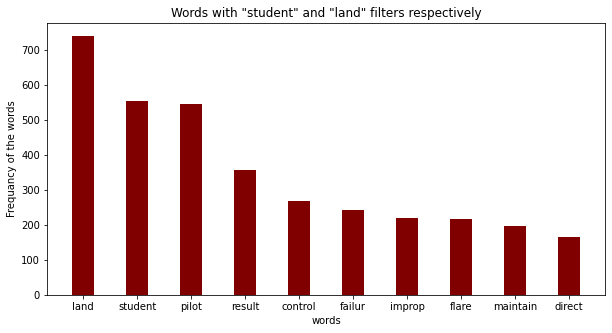

In [240]:
wrd = list(out.keys())
val = list(out.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(wrd, val, color ='maroon',
        width = 0.4)
 
plt.xlabel("words")
plt.ylabel("Frequancy of the words")
plt.title('Words with "student" and "land" filters respectively')
plt.show() 

In [270]:
slt_df

table_slice = slt_df[:][slt_df.columns[:]]
table_slice_condition = table_slice[table_slice != 0]

inv_den = {}
for word in table_slice.index:
  inv_den[word]= [np.log2(table_slice.columns.shape[0]/table_slice_condition.loc[word].dropna().shape[0])] if (table_slice_condition.loc[word].dropna().shape[0]) != 0 else 0

inv_den=pd.DataFrame(inv_den,index=["IDF"])
inv_den.T.to_csv("IDF_narrative2.csv")
inv_den = inv_den.T
inv_den

,IDF
student,0.000000
pilot,0.016457
failur,1.220575
maintain,1.454667
direct,1.689572
...,...
self-impos,9.047124
satur,9.047124
pictur,0.000000
snow/slush-cov,9.047124


In [271]:
inv_den.to_csv("IDF_narrative3.csv")

In [273]:
TF_IDF = freq_word.copy()
for word in table_slice.index:
  TF_IDF[word] = freq_word[word]*inv_den.loc[word][0]

TF_IDF.to_csv("TF-IDF_narrative3.csv")
TF_IDF

,student,pilot,failur,maintain,direct,control,takeoff,contribut,accid,lack,...,inad,remedia,told,lighti,positiv,self-impos,satur,pictur,snow/slush-cov,winglet
0,0.0,0.002743,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.002743,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.002351,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.001646,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.001266,0.187781,0.000000,0.000000,0.000000,0.0,0.249213,0.26179,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,0.0,0.001097,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
525,0.0,0.000914,0.000000,0.000000,0.000000,0.057550,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
526,0.0,0.002057,0.152572,0.181833,0.211196,0.129487,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
527,0.0,0.001829,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [308]:
# now calculate the sum
sum_tf_idf = TF_IDF.sum()
sum_tf_idf

student            0.000000
pilot              0.828068
failur            23.891929
maintain          24.750230
direct            25.955626
                    ...    
self-impos         0.411233
satur              0.753927
pictur             0.000000
snow/slush-cov     0.822466
winglet            0.000000
Length: 694, dtype: float64

In [309]:
sum_tf_idf=sum_tf_idf.sort_values(ascending=False, inplace=False)
sum_tf_idf

improp     30.422492
flare      28.044947
bounc      26.788137
direct     25.955626
hard       25.478967
             ...    
instead     0.000000
run-up      0.000000
releas      0.000000
cont        0.000000
winglet     0.000000
Length: 694, dtype: float64

In [311]:
dict_tf_idf=dict(sum_tf_idf)
# dict_tf_idf

In [321]:
# Python program to get N key:value pairs in given dictionary
# using itertools.islice() method

# Initialize limit
N = 10
     
# Using islice() + items()
# Get first N items in dictionary
out = dict(itertools.islice(dict_tf_idf.items(), N))
         
# printing result
print("Dictionary limited by K is : " + str(out))

Dictionary limited by K is : {'improp': 30.422491533431526, 'flare': 28.04494722631256, 'bounc': 26.788137003577855, 'direct': 25.955626150231097, 'hard': 25.478967056840162, 'maintain': 24.750229896596174, 'control': 24.163041033046895, 'failur': 23.891929489046092, 'recoveri': 21.5137390087133, 'loss': 18.306885074605244}


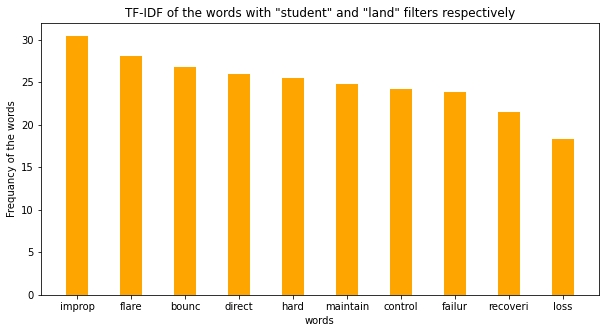

In [322]:
wrd = list(out.keys())
val = list(out.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(wrd, val, color ='orange',
        width = 0.4)
 
plt.xlabel("words")
plt.ylabel("Frequancy of the words")
plt.title('TF-IDF of the words with "student" and "land" filters respectively')
plt.show() 

In [333]:
TF_IDF['bounc']

0      0.352731
1      0.352731
2      0.302341
3      0.000000
4      0.000000
         ...   
524    0.141092
525    0.000000
526    0.000000
527    0.235154
528    0.000000
Name: bounc, Length: 529, dtype: float64

In [335]:
TF_IDF['bounc'].sort_values(ascending=False)[:]

0      0.352731
99     0.352731
56     0.352731
28     0.352731
72     0.352731
         ...   
199    0.000000
198    0.000000
197    0.000000
196    0.000000
528    0.000000
Name: bounc, Length: 529, dtype: float64

In [337]:
index_ev=[TF_IDF['bounc'].sort_values(ascending=False)[0:10].index]
index_ev[0]

Int64Index([0, 99, 56, 28, 72, 73, 74, 1, 329, 212], dtype='int64')

In [343]:
max_bounc=list(TF_IDF['bounc'].sort_values(ascending=False)[0:10])
max_bounc

[0.35273109575852324,
 0.35273109575852324,
 0.35273109575852324,
 0.35273109575852324,
 0.35273109575852324,
 0.35273109575852324,
 0.35273109575852324,
 0.35273109575852324,
 0.35273109575852324,
 0.35273109575852324]

In [344]:
df

,ev_id_new,damage_new,evtype_new,year_new,fatal_new,finding_new,cnar_new
0,20090101X22627,MINR,INC,2009,NONE,['Aircraft-Aircraft oper/perf/capability-Perfo...,The student pilot's failure to maintain direct...
1,20090102X02015,NONE,INC,2009,NONE,['Personnel issues-Task performance-Use of equ...,The pilot’s failure to maintain adequate flyin...
2,20090103X05930,MINR,INC,2009,NONE,['Personnel issues-Task performance-Planning/p...,A loss of engine power due to fuel exhaustion ...
3,20090103X62819,MINR,INC,2009,NONE,['Personnel issues-Task performance-Use of equ...,The pilot's failure to maintain adequate airsp...
4,20090103X93911,MINR,INC,2009,NONE,['Environmental issues-Conditions/weather/phen...,The non-instrument rated pilot's decision to c...
...,...,...,...,...,...,...,...
12316,20200922X90108,SUBS,ACC,2020,FATL,['Aircraft-Aircraft oper/perf/capability-Perfo...,The pilot’s inadequate compensation for gustin...
12317,20200922X91109,SUBS,ACC,2020,NONE,['Personnel issues-Task performance-Use of equ...,The pilot's loss of airplane control while man...
12318,20200923X30413,SUBS,ACC,2020,NONE,['Aircraft-Aircraft oper/perf/capability-Perfo...,A loss of directional control during landing f...
12319,20200923X61025,SUBS,ACC,2020,NONE,['Aircraft-Aircraft structures-Fuselage-Gear a...,The fatigue fracture failure of the left main ...


In [347]:
damage=list(df[df.columns[1]]) #damage_new column

bounc_ev=[]
for item in (index_ev[0]):
  bounc_ev.append((damage[item]))

bounc_ev

['MINR',
 'SUBS',
 'SUBS',
 'SUBS',
 'SUBS',
 'SUBS',
 'SUBS',
 'NONE',
 'SUBS',
 'SUBS']

In [348]:
fatal=list(df[df.columns[4]]) #fatal_new column

bounc_ev=[]
for item in (index_ev[0]):
  bounc_ev.append((fatal[item]))

bounc_ev

['NONE',
 'NONE',
 'NONE',
 'NONE',
 'NONE',
 'NONE',
 'NONE',
 'NONE',
 'NONE',
 'NONE']

## Student+ Takeoff

Dictionary limited by K is : {'level_0': 53423, 'takeoff': 144.0, 'pilot': 142.0, 'student': 140.0, 'control': 106.0, 'failur': 96.0, 'maintain': 84.0, 'direct': 74.0, 'result': 63.0, 'runway': 45.0}


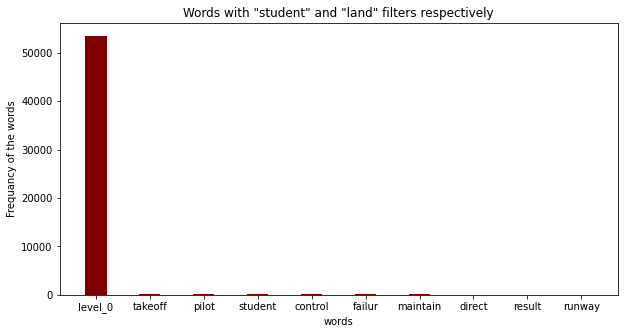

Dictionary limited by K is : {'level_0': 1.3146616723380622, 'failuir': 0.8805492649198067, 'delay': 0.6359554299657769, 'flight': 0.6250606185581725, 'accid': 0.6009053756415584, 'remedi': 0.5982097989061625, 'direct': 0.594841670516493, 'action': 0.5252103226167488, 'instructor': 0.5172351528786691, 'contribut': 0.48855408399410893}


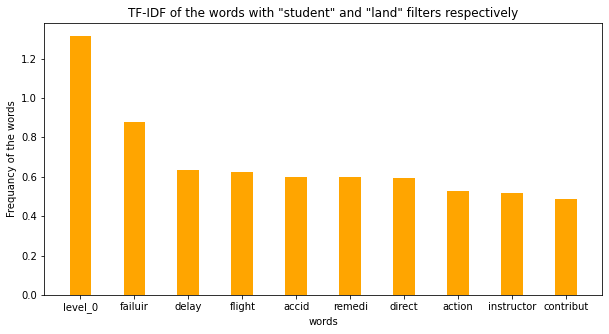

In [440]:
sto_df= newtable_df[(newtable_df.takeoff != 0)] # NEW filter: TAKEOFF
sto_df.reset_index(inplace=True)
sto_df

# now calculate the sum
s = sto_df.sum()
s

stot_df=sto_df.T
stot_df=stot_df.drop("ev_id")
stot_df=stot_df.drop("index")
stot_df

freq_word = {}
for word in stot_df.index[:]:
  freq_word[word]=[]
  for i in range(stot_df.shape[1]):
    freq_word[word].append(stot_df.loc[word][i]/sum(stot_df[i]))
freq_word=pd.DataFrame(freq_word)
freq_word

freq_word.to_csv("TF_sto_narrative3.csv")

s=s.drop("index")
s=s.drop("ev_id")
s

sort_sto=s.sort_values(ascending=False, inplace=False)


sort_sto=dict(sort_sto)

sto_dict={x:y for x,y in sort_sto.items() if y!=0}

# Initialize limit
N = 10
     
# Using islice() + items()
# Get first N items in dictionary
out = dict(itertools.islice(sto_dict.items(), N))
         
# printing result
print("Dictionary limited by K is : " + str(out))


wrd = list(out.keys())
val = list(out.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(wrd, val, color ='maroon',
        width = 0.4)
 
plt.xlabel("words")
plt.ylabel("Frequancy of the words")
plt.title('Words with "student" and "takeoff" filters respectively')
plt.show() 

stot_df

table_slice = stot_df[:][stot_df.columns[:]]
table_slice_condition = table_slice[table_slice != 0]

inv_den = {}
for word in table_slice.index:
  inv_den[word]= [np.log2(table_slice.columns.shape[0]/table_slice_condition.loc[word].dropna().shape[0])] if (table_slice_condition.loc[word].dropna().shape[0]) != 0 else 0

inv_den=pd.DataFrame(inv_den,index=["IDF"])
# inv_den.T.to_csv("IDF_sto_narrative3.csv")
inv_den = inv_den.T
inv_den

inv_den.to_csv("IDF_sto_narrative3.csv")

TF_IDF = freq_word.copy()
for word in table_slice.index:
  TF_IDF[word] = freq_word[word]*inv_den.loc[word][0]

TF_IDF.to_csv("TF-IDF_sto_narrative3.csv")
TF_IDF

# now calculate the sum
sum_tf_idf = TF_IDF.sum()
sum_tf_idf

sum_tf_idf=sum_tf_idf.sort_values(ascending=False, inplace=False)
sum_tf_idf

dict_tf_idf=dict(sum_tf_idf)


# Initialize limit
N = 10
     
# Using islice() + items()
# Get first N items in dictionary
out = dict(itertools.islice(dict_tf_idf.items(), N))
         
# printing result
print("Dictionary limited by K is : " + str(out))

wrd = list(out.keys())
val = list(out.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(wrd, val, color ='orange',
        width = 0.4)
 
plt.xlabel("words")
plt.ylabel("Frequancy of the words")
plt.title('TF-IDF of the words with "student" and "takeoff" filters respectively')
plt.show() 









# **NEW WORDS_ NEW CLASSIFICATION**

In [442]:
TF_IDF['roll'].sort_values(ascending=False)[0:10]

7     0.155359
14    0.038308
16    0.032517
19    0.024107
32    0.014341
47    0.010396
49    0.009952
48    0.009917
52    0.008992
53    0.008552
Name: roll, dtype: float64

In [443]:
index_ev=[TF_IDF['roll'].sort_values(ascending=False)[0:10].index]
index_ev[0]

Int64Index([7, 14, 16, 19, 32, 47, 49, 48, 52, 53], dtype='int64')

In [444]:
max_roll=list(TF_IDF['roll'].sort_values(ascending=False)[0:10])
max_roll

[0.15535925588415933,
 0.03830776172486121,
 0.03251705355714963,
 0.024107470740645415,
 0.014340854389307016,
 0.010395786639088729,
 0.009951838455213054,
 0.009916548247925065,
 0.008991854038311473,
 0.008551885644999598]

In [446]:
roll_ev=[]
for item in (index_ev[0]):
  roll_ev.append((fatal[item]))

roll_ev

['NONE',
 'NONE',
 'NONE',
 'NONE',
 'NONE',
 'NONE',
 'NONE',
 'NONE',
 'NONE',
 'NONE']

In [448]:
roll_dam=[]
for item in (index_ev[0]):
  roll_dam.append((damage[item]))

roll_dam

['SUBS',
 'SUBS',
 'SUBS',
 'SUBS',
 'SUBS',
 'SUBS',
 'SUBS',
 'SUBS',
 'SUBS',
 'SUBS']

In [450]:
# create empty data frame in pandas
dfroll = pd.DataFrame()
# add a coumn
dfroll['TF_IDF']  = max_roll
# dfroll['Event_No']=index_ev[0]
dfroll['Damage_Type']=roll_dam
dfroll.to_csv("Max_Roll_Analysis_nar3.csv")
dfroll

,TF_IDF,Damage_Type
0,0.155359,SUBS
1,0.038308,SUBS
2,0.032517,SUBS
3,0.024107,SUBS
4,0.014341,SUBS
5,0.010396,SUBS
6,0.009952,SUBS
7,0.009917,SUBS
8,0.008992,SUBS
9,0.008552,SUBS
